# Clustering time trends for New York City businesses

In [315]:
import pandas as pd
import geopandas as gp
import zipfile
from sklearn.cluster import KMeans, DBSCAN
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [293]:
zipcode_shape = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zipcode_shape.head()

,@id,BLDGpostalCode,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,Shape_Area,Shape_Leng,borough,geometry,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,2.016328e+07,20624.692317,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,2.260653e+07,23002.816039,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,6.269333e+06,15749.161511,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,4.941836e+07,35932.810639,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,6.938587e+07,38693.565676,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [294]:
zipcode_shape.columns

Index([           u'@id', u'BLDGpostalCode',       u'CTY_FIPS',
             u'OBJECTID',        u'PO_NAME',          u'STATE',
              u'ST_FIPS',     u'Shape_Area',     u'Shape_Leng',
              u'borough',       u'geometry',     u'postalCode'],
      dtype='object')

In [295]:
zipcode_shape = zipcode_shape.drop([  u'@id', u'BLDGpostalCode',       u'CTY_FIPS', u'ST_FIPS',
             u'OBJECTID', u'Shape_Area',     u'Shape_Leng'], axis = 1)
zipcode_shape = zipcode_shape.rename(columns={'postalCode' : 'zip'})
zipcode_shape.head()

,PO_NAME,STATE,borough,geometry,zip
0,Jackson Heights,NY,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372
1,Glen Oaks,NY,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004
2,New Hyde Park,NY,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040
3,Bellerose,NY,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426
4,Fresh Meadows,NY,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365


In [296]:
zipcode_shape['zip'] = pd.to_numeric(zipcode_shape['zip'])

In [297]:
year = []
for i in range(94, 100, 1):
    year.append(str(i))
for i in range(0, 10, 1):
    year.append('0'+str(i))
for i in range(10, 15, 1):
    year.append(str(i))

In [298]:
#Reading datafiles
for i in year:
    zf = zipfile.ZipFile('zbp'+i+'totals.zip')
    business_data = pd.read_csv(zf.open('zbp'+i+'totals.zip'.replace('.zip','.txt')))
    print("Year "+str(i)+'\n')
    print(business_data.head(2))
    print('\n')

Year 94

    zip         name empflag   emp    qp1      ap  est
0  1001   Agawam, MA     NaN  6198  33601  155158  439
1  1002  Amherst, MA     NaN  6073  28924  127367  450


Year 95

    zip             name empflag  emp  qp1    ap  est
0   501   Holtsville, NY       B    0    0     0    2
1  1000  Springfield, MA     NaN   49  529  2127    4


Year 96

    zip             name empflag  emp   qp1    ap  est
0   501   Holtsville, NY       B    0     0     0    4
1  1000  Springfield, MA     NaN  161  1494  6671   11


Year 97

    zip             name empflag  emp  qp1   ap  est
0   501   HOLTSVILLE, NY     NaN   47  168  523    4
1  1000  SPRINGFIELD, MA       E    0    0    0    8


Year 98

    ZIP            NAME EMPFLAG   EMP    QP1      AP  EST
0   501  HOLTSVILLE, NY     NaN     2     11      57    3
1  1001      AGAWAM, MA     NaN  7121  47926  215641  444


Year 99

    ZIP            NAME EMPFLAG   EMP    QP1      AP  EST
0   501  HOLTSVILLE, NY       B     0      0       0 

In [299]:
for i in year:
    zf = zipfile.ZipFile('zbp'+i+'totals.zip')
    temp = pd.read_csv(zf.open('zbp'+i+'totals.zip'.replace('.zip','.txt')))
    temp.columns = map(str.lower, temp.columns)
    temp = temp[['zip', 'est']]
    temp.rename(columns={'est' : 'est'+str(i)}, inplace=True)
    zipcode_shape = zipcode_shape.merge(temp, on = 'zip', how = 'inner')

### From the census data, I need only the 'zip' and 'est' columns for my analysis. In order to convert my columns into a standard format, I converted each column to lowercase. After getting the columns into the standard format, I merged them to get yearly data of the businesses.

In [300]:
zipcode_shape.shape

(243, 26)

In [301]:
zipcode_shape.columns

Index([ u'PO_NAME',    u'STATE',  u'borough', u'geometry',      u'zip',
          u'est94',    u'est95',    u'est96',    u'est97',    u'est98',
          u'est99',    u'est00',    u'est01',    u'est02',    u'est03',
          u'est04',    u'est05',    u'est06',    u'est07',    u'est08',
          u'est09',    u'est10',    u'est11',    u'est12',    u'est13',
          u'est14'],
      dtype='object')

In [302]:
zipcode_shape.head()

,PO_NAME,STATE,borough,geometry,zip,est94,est95,est96,est97,est98,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,Jackson Heights,NY,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,1229,1236,1292,1309,1351,...,1539,1527,1545,1538,1572,1629,1647,1724,1759,1768
1,Glen Oaks,NY,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,194,188,176,192,194,...,225,226,238,227,233,229,222,241,241,250
2,New Hyde Park,NY,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,1422,1414,1335,1344,1344,...,1441,1454,1488,1503,1475,1494,1488,1510,1539,1534
3,Bellerose,NY,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,326,219,209,198,203,...,226,226,228,226,237,248,256,266,258,260
4,Fresh Meadows,NY,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,492,476,483,522,509,...,604,608,617,616,628,643,677,679,714,731


In [303]:
#Whitening the data
est_mean = zipcode_shape.iloc[:,range(5,26)].mean(axis = 1)
est_std = zipcode_shape.iloc[:,range(5,26)].std(axis = 1)
zipcode_shape.iloc[:,range(5,26)] = zipcode_shape.iloc[:,range(4,26)].apply(lambda x: (x- est_mean) / est_std)
zipcode_shape.head()

,PO_NAME,STATE,borough,geometry,zip,est94,est95,est96,est97,est98,...,est05,est06,est07,est08,est09,est10,est11,est12,est13,est14
0,Jackson Heights,NY,Queens,POLYGON ((-73.86942457284175 40.74915687096787...,11372,-1.650515,-1.607088,-1.259673,-1.154208,-0.893647,...,0.272673,0.198227,0.309896,0.266469,0.477400,0.831018,0.942687,1.420382,1.637516,1.693350
1,Glen Oaks,NY,Queens,POLYGON ((-73.71068374074007 40.75004039450917...,11004,-0.974535,-1.248013,-1.794968,-1.065695,-0.974535,...,0.438432,0.484012,1.030967,0.529592,0.803069,0.620751,0.301694,1.167706,1.167706,1.577923
2,New Hyde Park,NY,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,11040,-0.118051,-0.234030,-1.379327,-1.248850,-1.248850,...,0.157401,0.345867,0.838780,1.056241,0.650313,0.925765,0.838780,1.157723,1.578149,1.505662
3,Bellerose,NY,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,11426,3.212291,-0.444253,-0.785986,-1.161892,-0.991026,...,-0.205040,-0.205040,-0.136693,-0.205040,0.170867,0.546773,0.820159,1.161892,0.888506,0.956853
4,Fresh Meadows,NY,Queens,POLYGON ((-73.81088634744755 40.72717187575918...,11365,-1.332578,-1.549090,-1.454366,-0.926619,-1.102534,...,0.183004,0.237132,0.358920,0.345388,0.507772,0.710751,1.170839,1.197903,1.671522,1.901566


### I have whitened the dataset. This has been done to decorrelate the each column of the dataset.

In [304]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

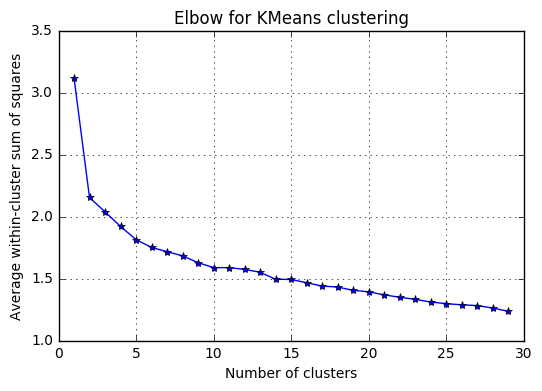

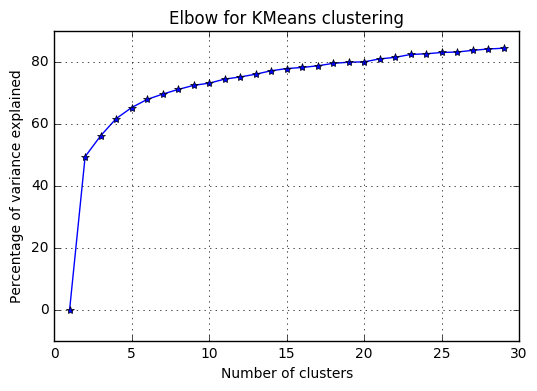

In [305]:
elbow(zipcode_shape.iloc[:, range(5,26)], range(1,30))

In [306]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

X=zipcode_shape.iloc[:, range(5,26)]
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.572142801777
For n_clusters =3, the average silhouette_score is :0.541435020202
For n_clusters =4, the average silhouette_score is :0.495601550463
For n_clusters =5, the average silhouette_score is :0.478801351965
For n_clusters =6, the average silhouette_score is :0.234252779225
For n_clusters =7, the average silhouette_score is :0.269653212641
For n_clusters =8, the average silhouette_score is :0.1408578891
For n_clusters =9, the average silhouette_score is :0.20686549319


### From the above figures and further using silhouette score, it is evident that number of clusters = 2. Hence, I am choosing number of clusters = 2

In [328]:
#KMeans cluster
kmeans_cluster = KMeans(2).fit(zipcode_shape.iloc[:, range(5,26)])
centers = kmeans_cluster.cluster_centers_
zipcode_shape['km_labels'] = kmeans_cluster.labels_

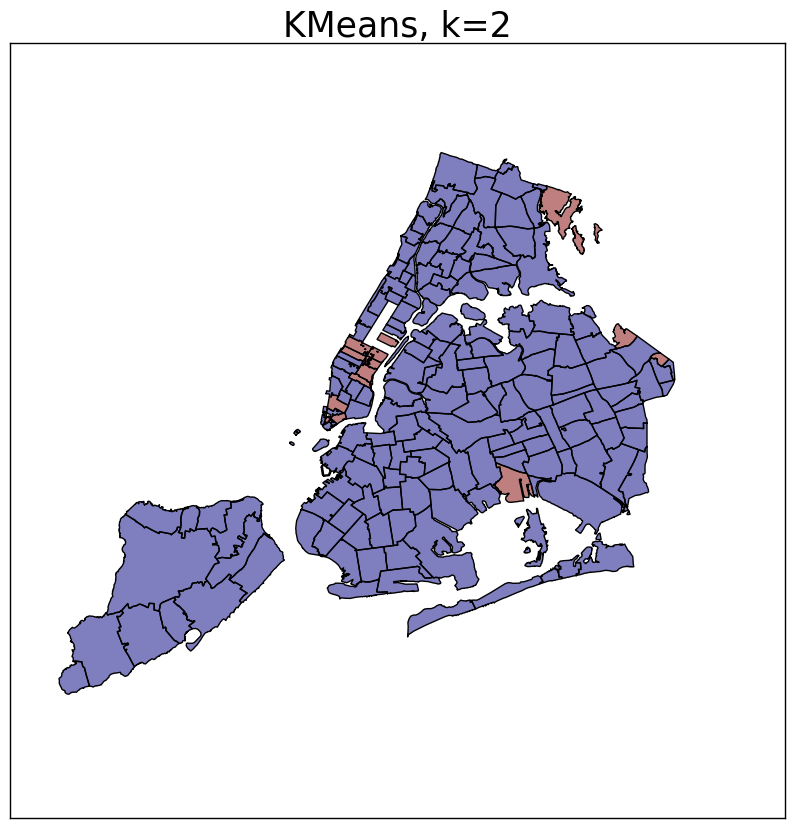

In [329]:
#Plotting KMeans cluster spatially
f, ax = plt.subplots(figsize=(10,10))
zipcode_shape.plot(colormap='jet', column='km_labels', ax=ax, categorical=True, k=2)
ax.set_title("KMeans, k=2", fontsize=25)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

In [319]:
#DBSCAN
dbscan_cluster = DBSCAN(2).fit(zipcode_shape.iloc[:,range(5,26)])
zipcode_shape['dbscan_labels'] = dbscan_cluster.labels_

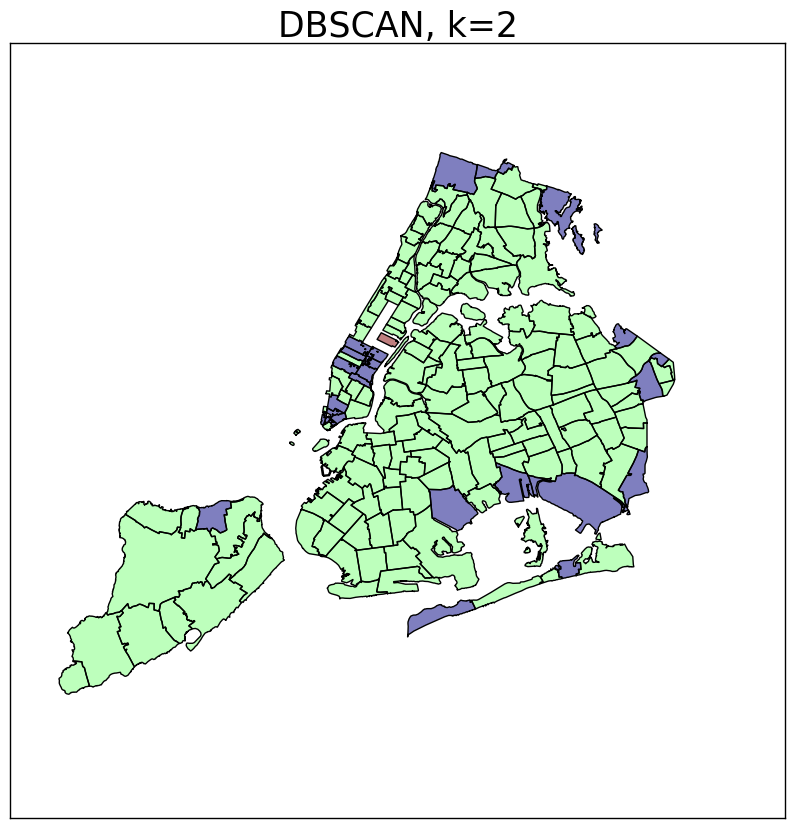

In [325]:
#Plotting DBSCAN cluster spatially
f, ax = plt.subplots(figsize=(10,10))
zipcode_shape.plot(colormap='jet', column='dbscan_labels', ax=ax, categorical=True)
ax.set_title("DBSCAN, k=2", fontsize=25)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)